## Principal Component Analysis

In [16]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
obesity_df = pd.read_csv('cleaned_obesity_data.csv')

In [18]:
## Extract only numeric variables from data set since only numerical data is used in PCA or Principal Component Analysis
obesity_numeric = obesity_df[['Food Environment Index', '% Physically Inactive', '% Limited Access to Healthy Foods',
       '% Frequent Physical Distress', '% Frequent Mental Distress',
       '% With Access to Exercise Opportunities', 'Life Expectancy',
       'Median Household Income', '% Uninsured Adults', '% Excessive Drinking']]

In [19]:
# Actual PCA
# The data will be divided into two main principal components

scaler = StandardScaler()
scaler.fit(obesity_numeric)

scaled_data = scaler.transform(obesity_numeric)

pca = PCA(n_components=2)
pca.fit(scaled_data)

x_pca = pca.transform(scaled_data)
scaled_data.shape
x_pca.shape

(2712, 2)

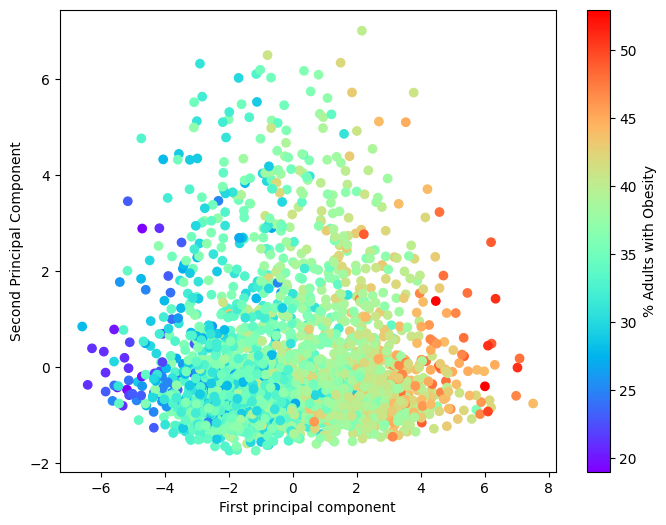

In [20]:
# This plot will show how well the principal components correlate with obesity rate.

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c = obesity_df['% Adults with Obesity'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.colorbar(label = '% Adults with Obesity')

The above plot shows that the first principal component corellates with obesity rate much better that the second principal component.

<Axes: >

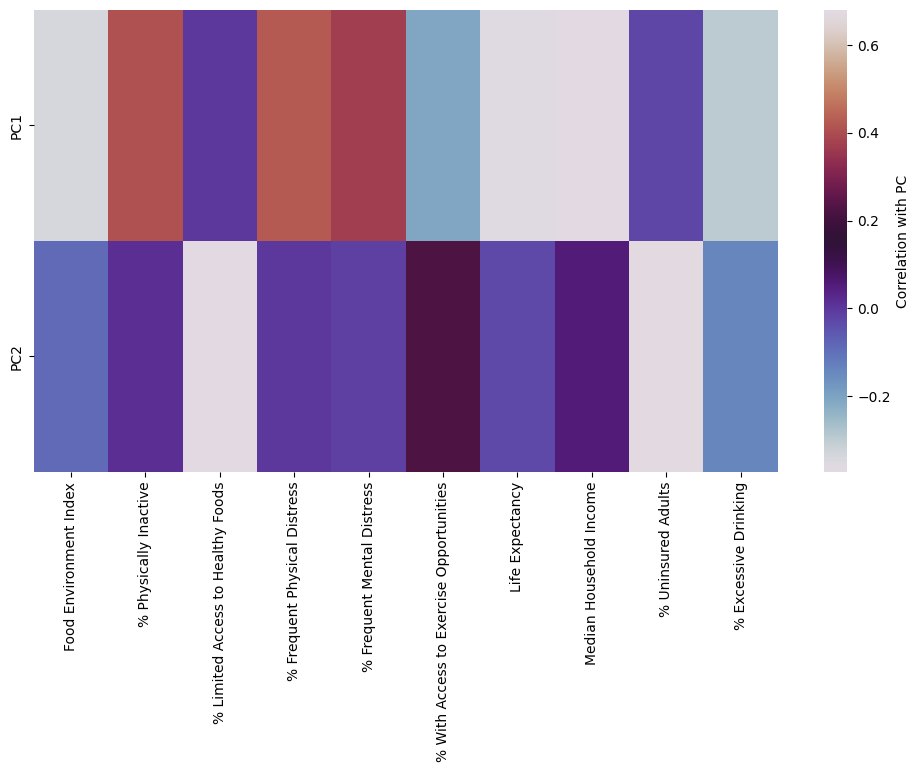

In [21]:
map= pd.DataFrame(pca.components_,columns = obesity_numeric.columns)
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight', yticklabels=['PC1', 'PC2'], cbar_kws = {'label' : 'Correlation with PC'})


The above heatmap shows which variables make up each principal component and to what degree. 